<a href="https://colab.research.google.com/github/xtianu/UPC_DAPR_2025/blob/main/S3/S3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SESSION 3: PCA**
by Christian Mata (christian.mata@upc.edu)

**Introduction**

Principal component analysis(PCA) is considered as one of the most popular technique for linearly independent feature extraction and dimensionality reduction. We sometimes have machine learning problems in which input features have very high dimensions, which complicates machine learning, increasing processing and reducing accuracy.
So, our first task is to reduce high dimensional input feature space, to a lower dimensional space which is more effective in machine learning task.
So PCA has several benefits including data compression, improved visualization, increasing performance, simplifying machine learning models etc.

It is important to note that it is not only possible to reduce dimensionality of input feature space using PCA while retaining most of the variability of the data, but it is also possible to reconstruct the the original data through back projection techniques.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Importance of Feature Scaling**

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

Automatically created module for IPython interactive environment

Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


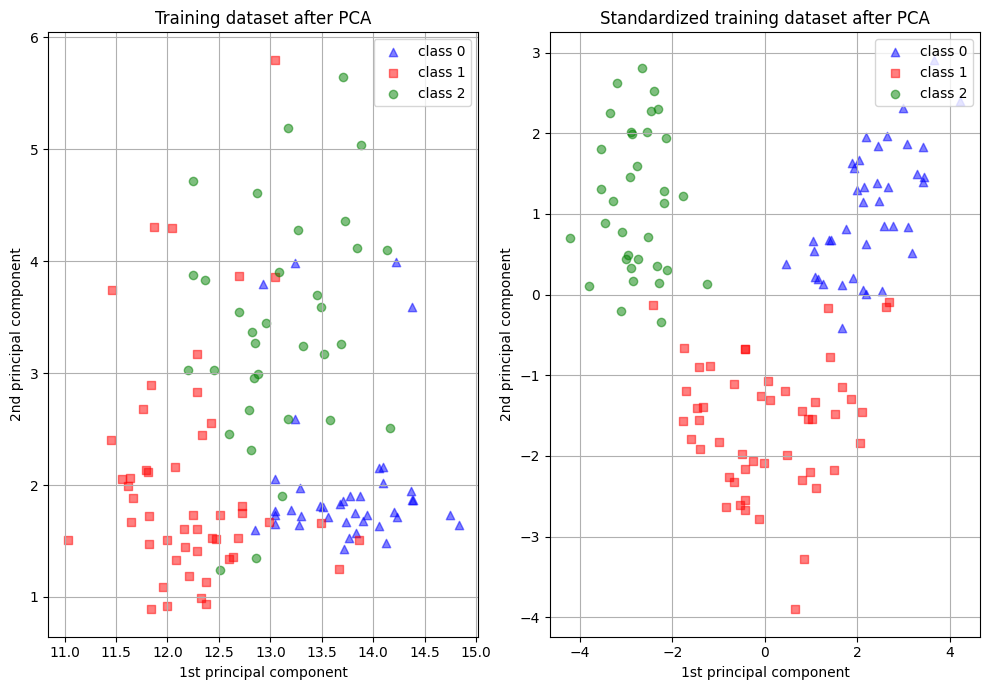

In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Wine dataset Sklearn from KAGGLE
# https://www.kaggle.com/code/cristianlapenta/wine-dataset-sklearn-machine-learning-project

features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

**Correlated Data in Nature**

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [3]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from google.colab import drive
drive.mount('/content/drive')

# Any results you write to the current directory are saved as output.

# Reading grains data
grains = pd.read_csv('/content/drive/MyDrive/DAPR/Lab/input/seeds.csv')

Mounted at /content/drive


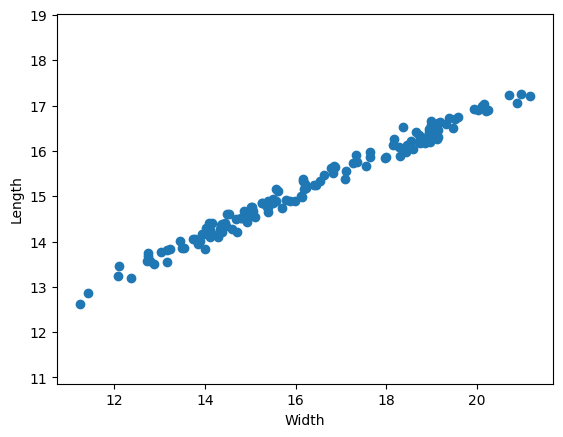

0.9924142588988772


In [4]:
# Load the two main features from seed

# Assign the 0th column of grains: width
width = grains.iloc[:,0]

# Assign the 1st column of grains: length
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.xlabel('Width')
plt.ylabel('Length')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


**De-Correlating the Feature Measurements with PCA**

You observed in the previous exercise that the width and length measurements of the grain are correlated.
Now, you will use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.


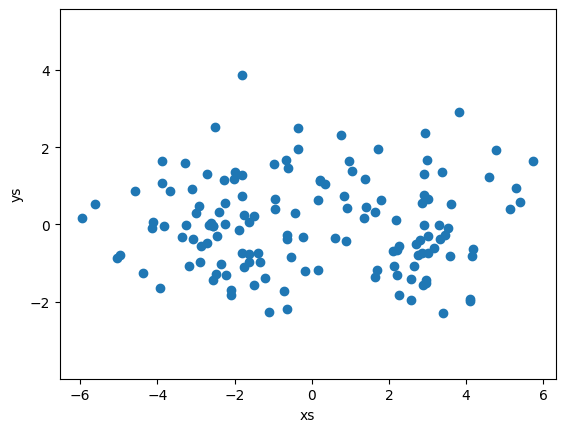

Correlation :  7.543011354416151e-15


In [5]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.xlabel('xs')
plt.ylabel('ys')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Correlation : ",correlation)


**Analyzing First Principal Component**

> The first principal component of the data is the direction in which the data varies the most.The first principal component of the data is the direction in which the data varies the most.

In this exercise, the objective is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples.

PyPlot (plt) and PCA have already been imported for you.


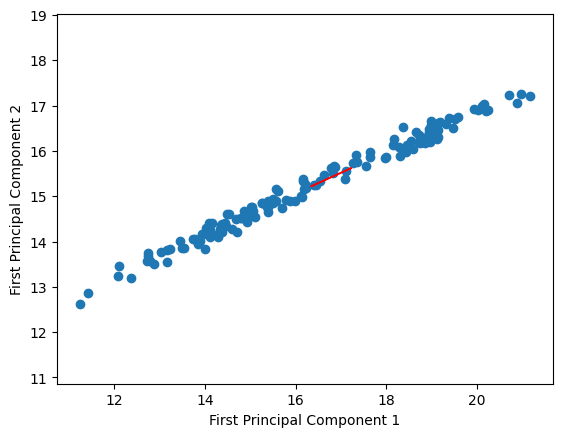

In [6]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.xlabel('First Principal Component 1')
plt.ylabel('First Principal Component 2')
plt.show()


**Feature Selection by Analyzing Variance of the PCA Features**

The seed dataset is multi-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a crop. You'll need to standardize the features first.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERIMETER               140 non-null    float64
 1   COMPACTNESS             140 non-null    float64
 2   LENGTH                  140 non-null    float64
 3   WIDTH                   140 non-null    float64
 4   ASSYMMETRY_COEFFICIENT  140 non-null    float64
 5   GROOVE_LENGTH           140 non-null    float64
 6   TYPE                    140 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 7.8 KB
Samples Info  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PERIMETER               140 non-null    float64
 1   COMPACTNESS             140 non-null    float64
 2   LENGTH                  140 n

/tmp/ipython-input-1223821378.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
135    2.0
136    2.0
137    2.0
138    2.0
139    2.0
Name: TYPE, Length: 140, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  samples.iloc[:,-1] = s1


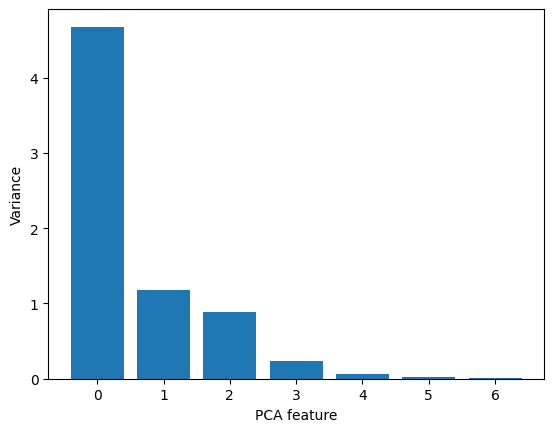

In [7]:
# ----- Standardize ------

#Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Reading grains data
grains = pd.read_csv('/content/drive/MyDrive/DAPR/Lab/input/seeds.csv')
samples = grains.iloc[:,1:]
print("Samples Info ",samples.info())
# Preprocessing : Changing type of last column from int to float
s1=samples.iloc[:,-1]
s1=s1.astype(float)
samples.iloc[:,-1] = s1
print("Samples Info Updated ",samples.info())

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


**Dimensionsionality Reduction of the Seed Measurements**

In a previous exercise, you saw that 4 was a reasonable choice for the "intrinsic dimension" of the seed measurements.

Now use PCA for dimensionality reduction of the seed measurements, retaining only the 4 most important components.


In [8]:
# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaled samples
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)
print('Scaled Samples \n',scaled_samples[1:5,:])

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print("PCA Features Shape \n",pca_features.shape)

print("PCA Features \n", pca_features[1:10,:])


Scaled Samples 
 [[-0.58900145 -0.04381444 -0.6761741  -0.45450091 -1.68692904 -1.12224002
  -1.        ]
 [-1.02732811  1.46600124 -1.32510102 -0.44030013 -0.36064598 -1.36812008
  -1.        ]
 [-1.16430519  0.8658653  -1.24367673 -0.29119198 -0.70779919 -1.40565902
  -1.        ]
 [-0.20546562  1.36492571 -0.41956421  0.35849352 -1.42104124 -0.71118863
  -1.        ]]
PCA Features Shape 
 (140, 2)
PCA Features 
 [[-2.00164836  0.40846809]
 [-2.20319086  1.7929705 ]
 [-2.30225286  1.33449254]
 [-1.00858956  1.78462077]
 [-2.07013983  1.1339057 ]
 [-1.54028375 -0.06572986]
 [-2.04445251  0.8452829 ]
 [-0.00549677 -0.44010998]
 [-0.43816519  0.5623188 ]]


**Conclusion**

Here, I have shared several examples of PCA for dimensionality reduction and improving performance of machine learning algorithms.   While PCA does improve performance in many cases, but sometimes is not necessary!

***"Don't assume you need to do PCA. Try your full machine learning algorithm without PCA first. Then use PCA if you find that you need it."***

